# Deforestation and Climate change

Climate change is a the general problem of today more appart from other area that afffect the climate, deforectation is one of the major problem. This is so because these are millions of unprotected tress that indiscriminately cut down every secod in various parts of the world.

An introductory mini project on deforestation and its logistic regresssion approach to discern how it affects climate change
# New Section
introductory importation of dictionaries for beginners project and cosequent use of simulated data.

In [144]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Consequent we make use of simulated data since this is form of a beginners project.

In [145]:
# Simulate data for testing
np.random.seed(42)
num_trees = 100
tree_data = {
    'tree_id': range(1, num_trees + 1),
    'species': np.random.choice(['Oak', 'Maple', 'Pine'], num_trees),
    'size': np.random.uniform(10, 50, num_trees),  # Assuming size is measured in meters
    'location': np.random.choice(['Urban', 'Rural'], num_trees),
    'carbon_absorption_rate': np.random.uniform(5, 20, num_trees),  # Carbon absorption rate in kg/year
    'is_protected': np.random.choice([True, False], num_trees)  # Indicates whether the tree is in a protected area
}

We need to crewat the dataframe and set our scoring measure for the trees

In [146]:

# Create a DataFrame
data = pd.DataFrame(tree_data)

# Define the scoring system
def calculate_tree_score(tree):
    score = tree['size'] * 0.5

Now based on different species we go on with investigetting the score of different trees.

In [147]:
def calculate_tree_score(tree):
    # Species-based scoring
    if tree['species'] == 'Oak':
        score += 1.5
    elif tree['species'] == 'Maple':
        score += 1.0
    elif tree['species'] == 'Pine':
        score += 0.5

    # Location-based scoring
    if tree['location'] == 'Urban':
        score *= 1.2  # Urban trees have a 20% bonus
    elif tree['location'] == 'Rural':
        score *= 0.8  # Rural trees have a 20% penalty

    # Consider carbon absorption rate
    score += tree['carbon_absorption_rate'] * 0.1  # Adjust score based on carbon absorption

    # Penalize trees in unprotected areas
    if not tree['is_protected']:
        score *= 0.5  # Trees in unprotected areas have a 50% penalty

    return score




Apllying scoring function before the initial splitting for logistic regression



In [148]:

# Split data for machine learning (80% training, 20% testing)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#Stipulating the split/train/ test procedure

Here are the feature for the ML. Thexe range from size and the random forest claissifier. However its good to note that any library i need i go back to the initaial code and import.

In [149]:
# Features for machine learning
features = ['size', 'carbon_absorption_rate']
X_train, y_train = train_data[features], train_data['is_protected']
X_test, y_test = test_data[features], test_data['is_protected']
# Apply the scoring function to each row in the DataFrame

# Train a simple Random Forest classifier
classifier_rf = RandomForestClassifier(random_state=42)
classifier_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = classifier_rf.predict(X_test)

simple accuracy validation of random forest

In [150]:
# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf:.2f}')

# Display classification report for Random Forest
print('\nClassification Report for Random Forest:')
print(classification_report(y_test, predictions_rf))

Random Forest Model Accuracy: 0.60

Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       0.64      0.64      0.64        11
        True       0.56      0.56      0.56         9

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



Next is **Logistic regression** as a means of testing our accuracy

In [151]:
# Train a Logistic Regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier_lr = LogisticRegression(random_state=42)
classifier_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Predicting with the use of **Logistic regression**

Simple pairplots from our lovely Seaburn and other related libs.

In [152]:
# Make predictions on the test set
predictions_lr = classifier_lr.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, predictions_lr)
print(f'Logistic Regression Model Accuracy: {accuracy_lr:.2f}')

# Display classification report for Logistic Regression
print('\nClassification Report for Logistic Regression:')
print(classification_report(y_test, predictions_lr))



Logistic Regression Model Accuracy: 0.30

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.36      0.36      0.36        11
        True       0.22      0.22      0.22         9

    accuracy                           0.30        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.30      0.30      0.30        20



The use of **correlation matrix** and it ploting to visualize our Ml approaches

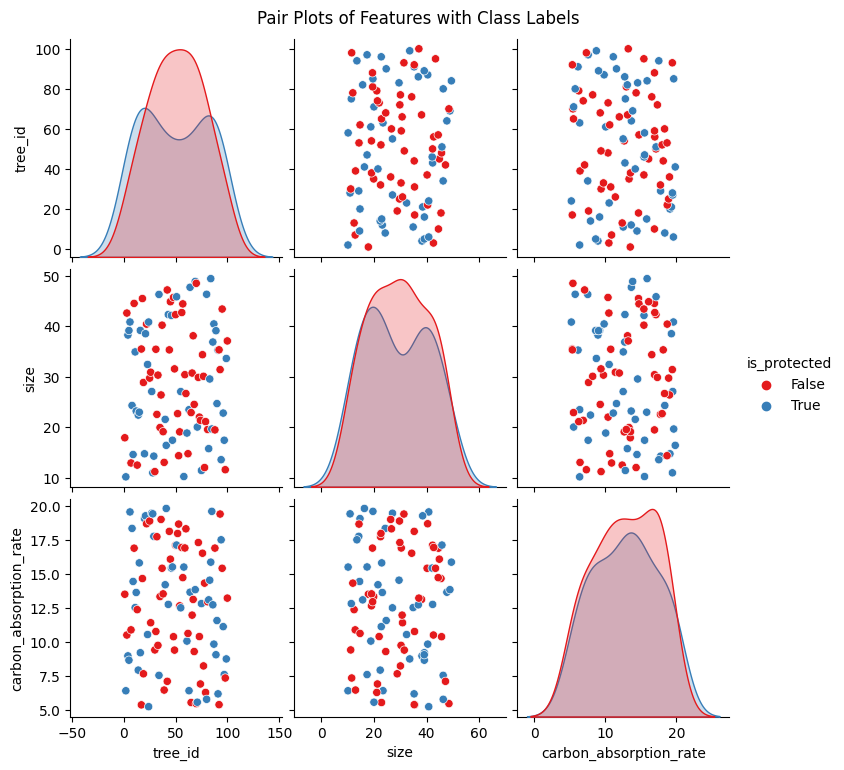

In [153]:
# Visualize the data with pair plots
sns.pairplot(data, hue='is_protected', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plots of Features with Class Labels', y=1.02)
plt.show()

Simple unsupervised learning and the use of KMeans clustering and its vizuals

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


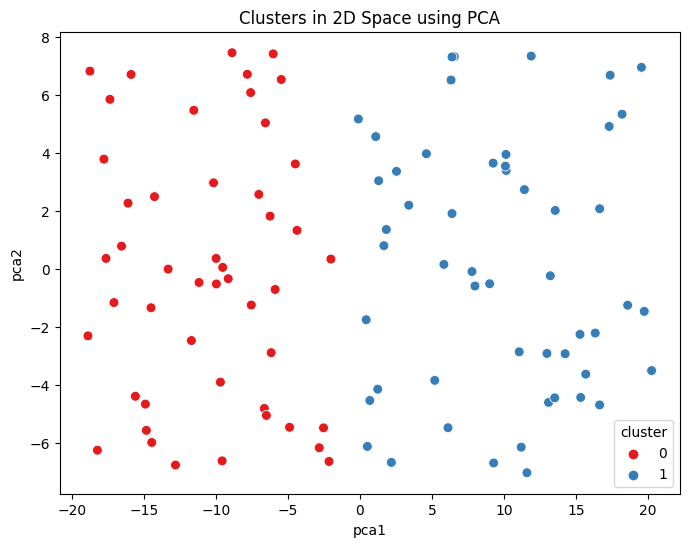

In [154]:
# Perform KMeans clustering (Unsupervised Learning)
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster'] = kmeans.fit_predict(data[features])

# Visualize the clusters in 2D using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[features])
data['pca1'] = data_pca[:, 0]
data['pca2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='Set1', s=50)
plt.title('Clusters in 2D Space using PCA')
plt.show()

Having done the simple ML though without the check of their accuracy model, i am set to display some **interactive widgets**. of the treee species


In [155]:
# Display interactive widgets and function
species_dropdown = widgets.Dropdown(options=['All'] + list(data['species'].unique()), value='All', description='Species:')
location_dropdown = widgets.Dropdown(options=['All'] + list(data['location'].unique()), value='All', description='Location:')
min_size_slider = widgets.FloatSlider(value=data['size'].min(), min=data['size'].min(), max=data['size'].max(), description='Min Size:')
max_size_slider = widgets.FloatSlider(value=data['size'].max(), min=data['size'].min(), max=data['size'].max(), description='Max Size:')

def filter_and_display_data(species, location, min_size, max_size):
    filtered_data = data.copy()

    if species != 'All':
        filtered_data = filtered_data[filtered_data['species'] == species]

    if location != 'All':
        filtered_data = filtered_data[filtered_data['location'] == location]

    filtered_data = filtered_data[(filtered_data['size'] >= min_size) & (filtered_data['size'] <= max_size)]

    display(filtered_data)

In [156]:
# Create interactive layout
interactive_layout = widgets.interactive(filter_and_display_data, species=species_dropdown, location=location_dropdown, min_size=min_size_slider, max_size=max_size_slider)

# Display the interactive widgets
display(interactive_layout)

interactive(children=(Dropdown(description='Species:', options=('All', 'Pine', 'Oak', 'Maple'), value='All'), …